<center>
<img src =data/hello.gif width = 500 />
</center>

#### Please state what was wrong with Professor's first example of the sampling of the bimodal distribution to illustrate the Central Limit Theorem.

Below is the answer

## Approaches for Demonstrating the Central Limit Theorem

Both of the following approaches can be used to illustrate aspects of the Central Limit Theorem, depending on the specific aspect we want to demonstrate:

**Approach 1: Random Sampling with Replacement**

In this approach, random samples of 10 data points are drawn from the dataset `x` with replacement. The means of these 10-point samples are collected, and the means are then plotted.

```python
import random
mean_10 = []
for i in range(5000):
    sample_10 = random.choices(x, k=10)
    mean_10.append(np.mean(sample_10))
plt.plot(mean_10)


**Approach 2: Moving Average with Non-Overlapping Windows**

In this approach, the dataset `x` is divided into non-overlapping windows of 11 data points, and the mean of each window is calculated. These means are then plotted over time, showing how the distribution of sample means evolves.

```python
mean_10 = [sum(x[i:i+11]) / 10. for i in range(0, 20000, 10)]
plt.plot(np.linspace(0, 1, 2000), mean_10)


- The first approach, random sampling with increasing sample size, demonstrates the Central Limit Theorem (CLT) by showing how the distribution of sample means evolves as the sample size increases, a fundamental concept in the CLT.

- The second approach, calculating means with overlapping windows, is not primarily for demonstrating the CLT but for observing how the distribution changes over time.

- The choice between these approaches depends on our specific objectives. We should use the first approach to illustrate the CLT, emphasizing the normal distribution of sample means with increasing sample size. We will choose the second approach for exploring time-based data behavior.


###  Small Errors which we think is important
if you go through the professor code of first example of bimodal distribution to illustrate the Central Limit Theorem, there is very small error.

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [14]:
x1 = np.random.normal(0, 2, 10000)
x2 = np.random.normal(5, 1, 10000)
x = np.r_[x1, x2]
len(x)

20000

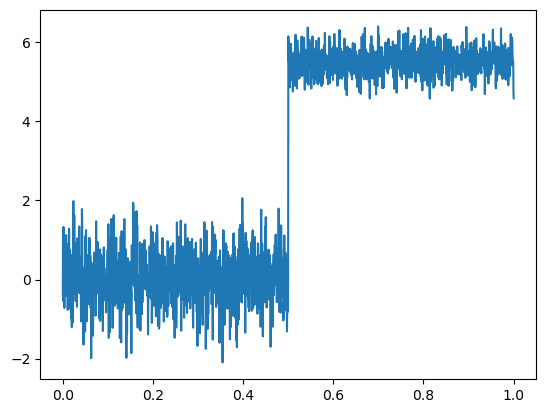

In [15]:
mean_10 = [sum(x[i:i+11]) / 10. for i in range(0, 20000, 10)]
plt.plot(np.linspace(0, 1, 2000), mean_10)
#Here he meant to calculate the mean of 10 elements but according to code it is calculating mean of 11 elements except last sum of 10 elements

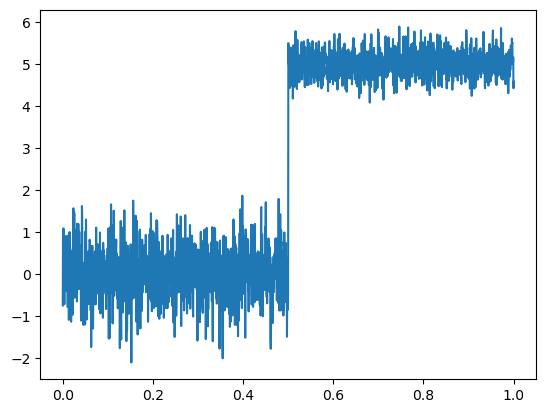

In [16]:
#here is the correct code
mean_10 = [sum(x[i:i+10]) / 10. for i in range(0, 20000, 10)]
plt.plot(np.linspace(0, 1, 2000), mean_10)

## Why `(i:i+11)` is Wrong and `(i:i+10)` is Correct for CLT

In the context of the Central Limit Theorem (CLT) and calculating the mean of sample means, the choice of window size is crucial. Here's an explanation of why using a window size of `(i:i+11)` is incorrect, while `(i:i+10)` is appropriate:

- The CLT applies to a scenario where you are calculating the mean of sample means. In your case, you are calculating the mean of sample means with a window size of 10 (`i:i+10`) and then plotting these means.

- In the CLT, it's essential that the sample means are calculated from independent and identically distributed random variables. In the second option, you are using a window size of 10, ensuring that each mean is calculated from a sample of 10 data points. This aligns with the principles of the CLT, where larger sample sizes are often used to approximate the distribution of sample means.

- On the other hand, the first option uses a window size of 11 (`i:i+11`), which results in overlapping samples between adjacent means. This can lead to non-independence between the sample means, violating the fundamental assumption of the CLT.

So, when considering the Central Limit Theorem, it's more appropriate to use a window size of 10 (as in the second option) to ensure that each mean is calculated from a non-overlapping set of 10 data points, preserving the independence and i.i.d. characteristics required by the CLT.


In [17]:
#same with this
mean_100 = [sum(exp_variates[i : i + 101]) / 100. for i in range(0, 20000, 100)]
plt.plot(np.linspace(0, 1, 200), mean_100)

NameError: name 'exp_variates' is not defined

same issue with this also but if you notice it should have been **x list** not **exp_variates**, so the output generated in that code was based on wrong data

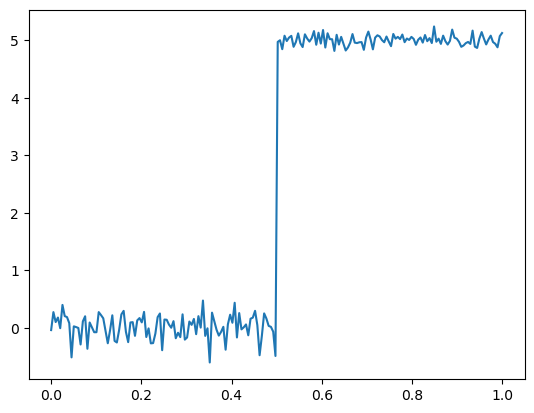

In [18]:
#here is the correct code with correct dataset
mean_100 = [sum(x[i : i + 100]) / 100. for i in range(0, 20000, 100)]
plt.plot(np.linspace(0, 1, 200), mean_100)

## Below is some experiment

<center>
<img src =data/experiiment.gif width = 500 />
</center>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a bi-modal distribution with a mixture of Normals
x1 = np.random.normal(0, 2, 10000)
x2 = np.random.normal(5, 1, 10000)

# Append by row
x = np.r_[x1, x2]

## Approach 1: Random Sampling with Replacement

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset(dataset):
    plt.figure(figsize=(12, 5))

    # Plot the line plot
    plt.subplot(1, 2, 1)
    plt.plot(dataset)
    plt.title('Line Plot of the Dataset')
    plt.xlabel('Data Point Index')
    plt.ylabel('Value')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(dataset, bins=20, density=True, alpha=0.5)
    plt.title('Histogram of the Dataset')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    
    plt.tight_layout()
    plt.show()

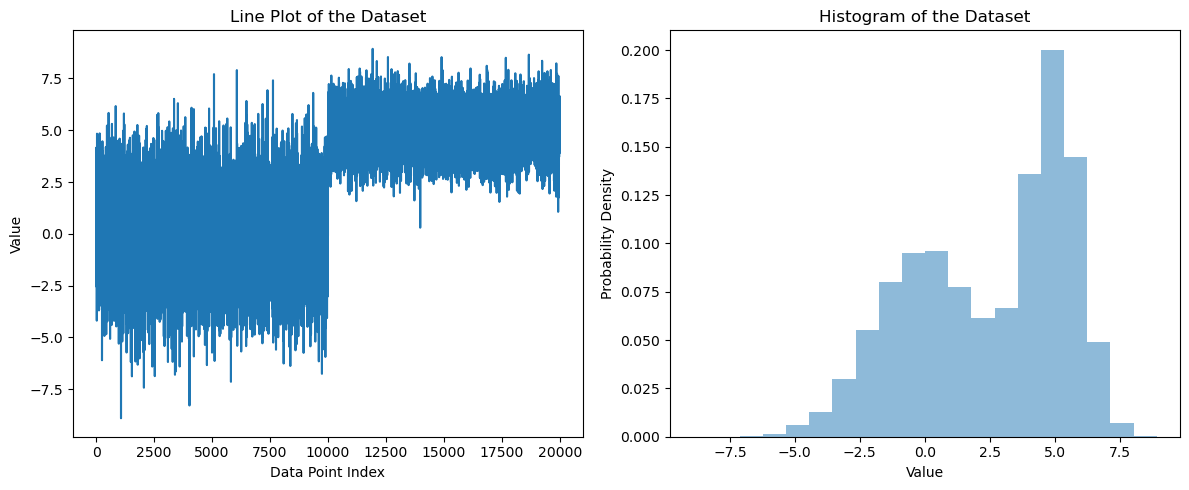

In [43]:
# Example usage:
plot_dataset(x)

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt

def plot_dataset_and_means(dataset, sample_size, num_samples):
    sample_means = []
    
    for _ in range(num_samples):
        sample = random.choices(dataset, k=sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    plt.figure(figsize=(12, 5))

    # Plot the line plot
    plt.subplot(1, 2, 1)
    plt.plot(sample_means)
    plt.title(f'Mean of {sample_size} Samples')
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Mean')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(sample_means, bins=20, density=True, alpha=0.5)
    plt.title(f'Histogram of Sample Means ({sample_size} Samples)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_dataset_and_means(x, 2, 5000)


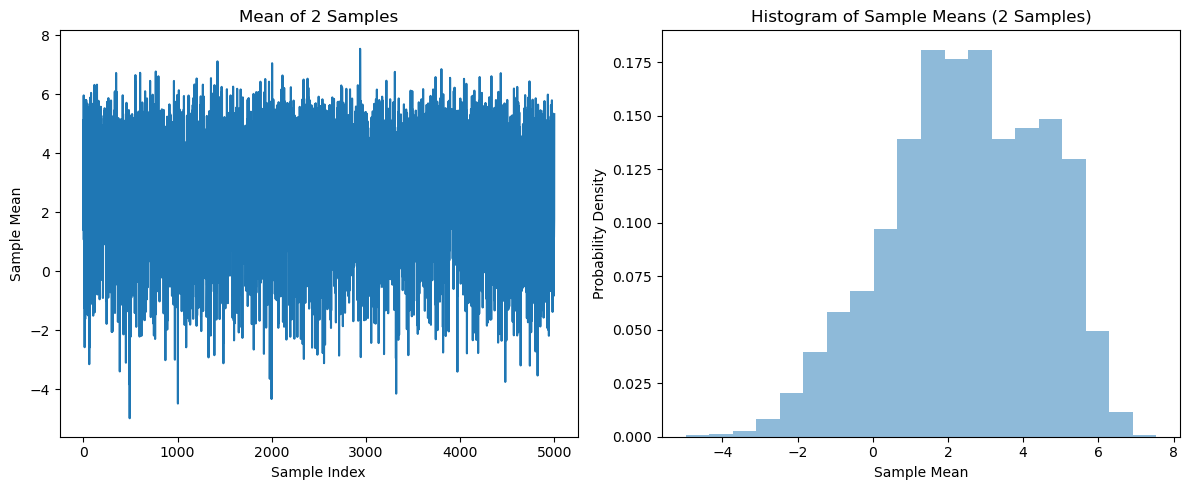

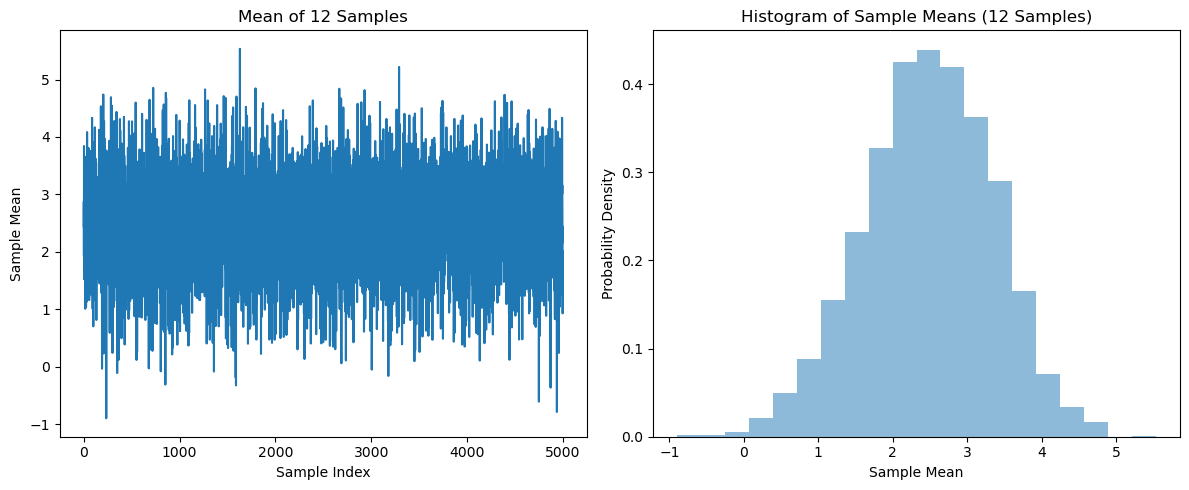

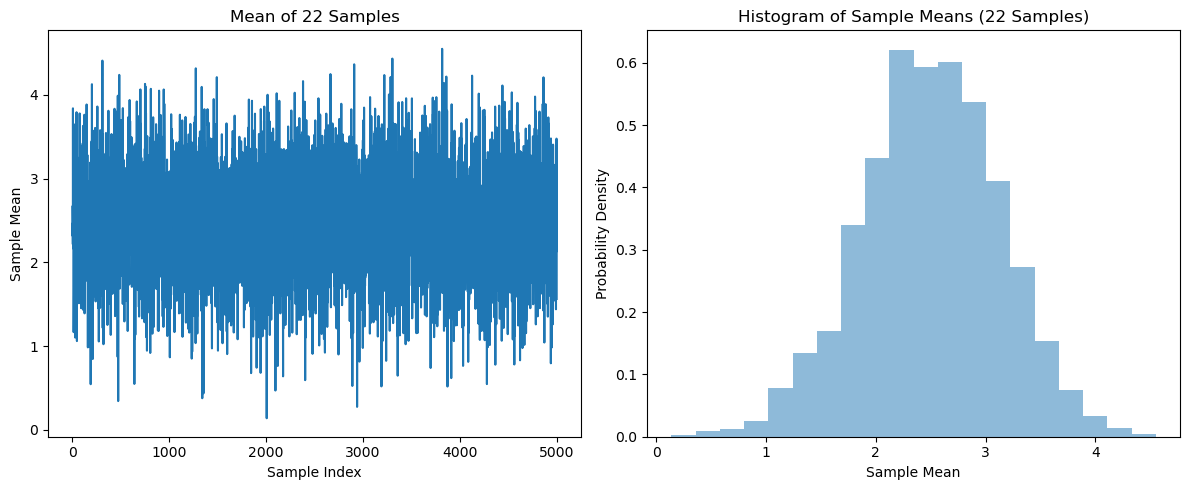

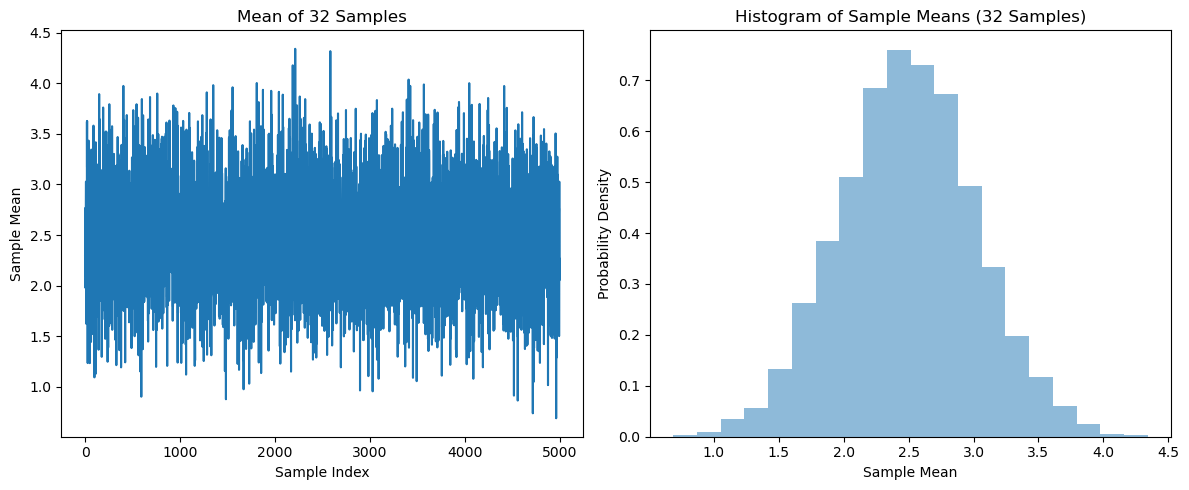

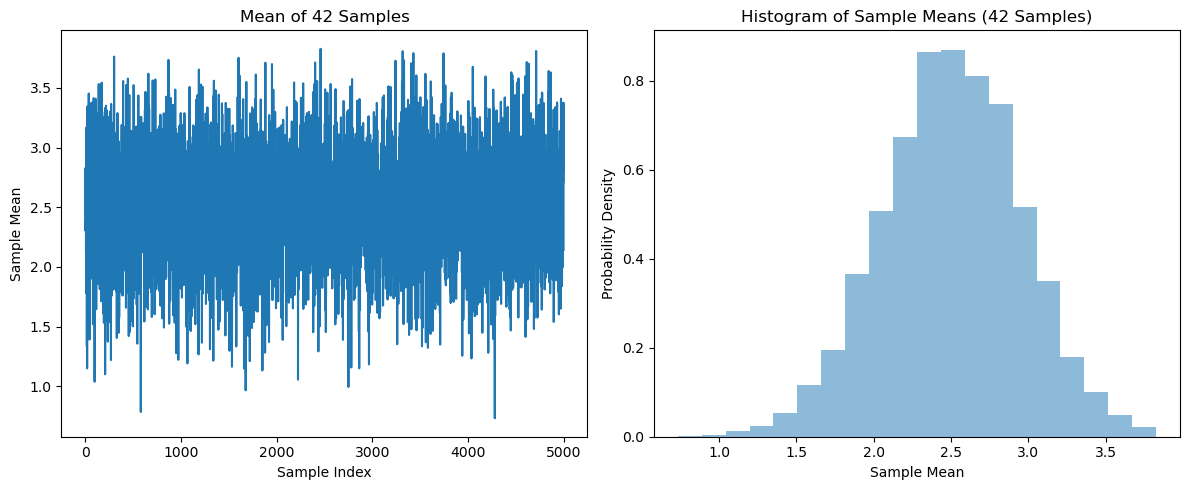

In [45]:
cnt = 0
count = 5000
for i in range(2, len(x), 10):
    cnt +=1
    plot_dataset_and_means(x, i, count)
    if cnt==5:
        break

## Approach 2: Moving Average with Non-Overlapping Windows

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_moving_mean(x, window_size, num_bins=20, range_=None):
    moving_mean = [sum(x[i : i + window_size]) / window_size for i in range(0, len(x), window_size)]

    # Plot the moving mean
    plt.figure(figsize=(12, 4))  
    plt.subplot(1, 3, 1)
    plt.plot(np.linspace(0, 1, len(moving_mean)), moving_mean)
    plt.xlabel("Time")
    plt.ylabel("Moving Mean")
    plt.title(f"Moving Mean (Window Size = {window_size})")
    
    # Create histograms of the moving mean
    
    plt.subplot(1, 3, 2)
    plt.hist(moving_mean, num_bins, density=True)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Histogram of Moving Mean")
    
    plt.subplot(1, 3, 3)
    plt.hist(moving_mean, num_bins, density=True, range=range_)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Histogram of Moving Mean")

    plt.tight_layout()
    plt.show()

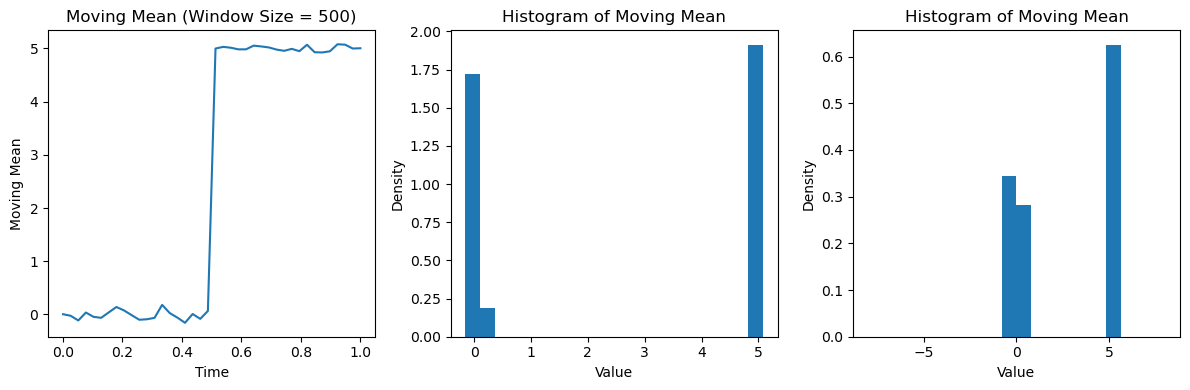

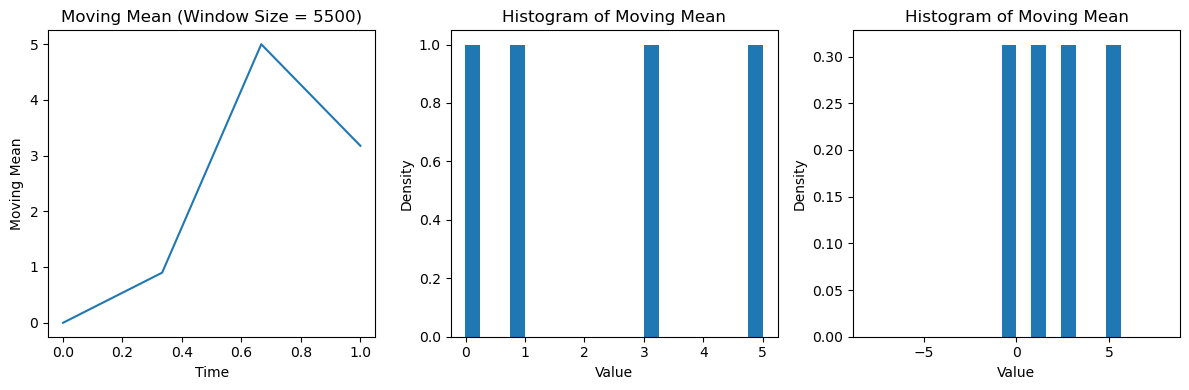

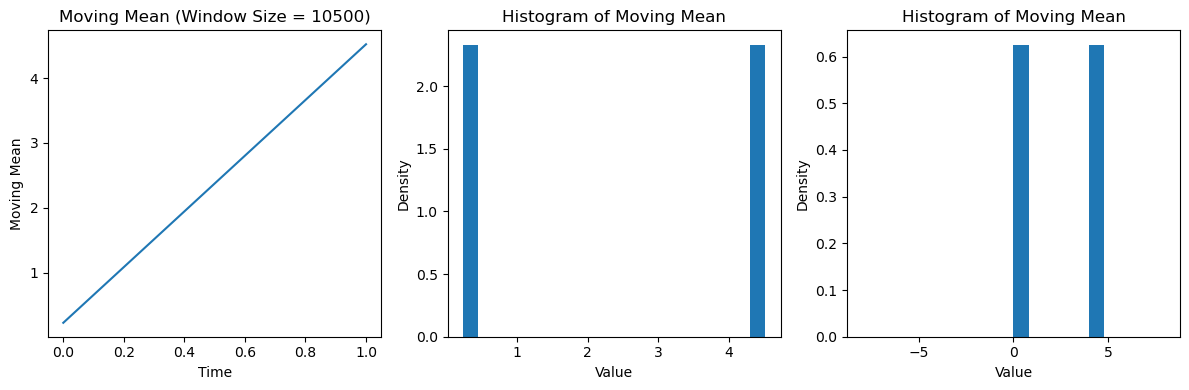

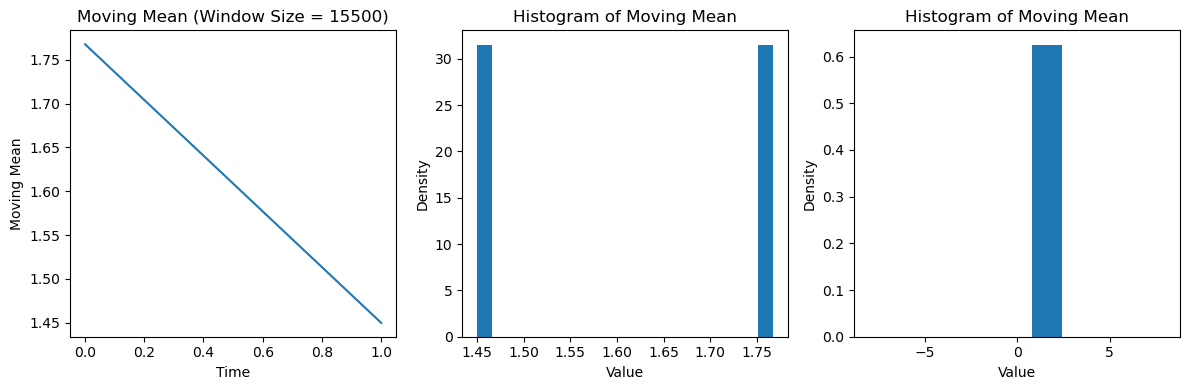

In [49]:
for i in range(500, len(x), 5000):
    calculate_and_plot_moving_mean(x, i, num_bins=20, range_=[-8, 8])

**You can clearly notice that Approach 1 describes the Central Limit Theorem accurately as we can see how the distribution of sample means evolves as the sample size increases, which is a key concept in the CLT.**

<center>
<img src =data/bybye.gif width = 500 />
</center>